In [2]:
import numpy as np
from collections import deque
import heapq
import matplotlib.pyplot as plt
import time

# Définition des constantes
DEPART = 'D'    # Position de départ (rouge)
ARRIVEE = 'A'     # Sortie (vert)
MUR = '|'     # Mur (gris)
EAU = 'W'    # Eau (bleu)
EMPTY = '.'     # Case vide

# Matrice adaptée avec vos indices
grid = [
    ['.', '.', '.', '.', '.', 'W', 'W', 'W', '.', 'W', 'W'],
    ['.', '.', '|', '|', '.', '|', 'W', 'W', '.', 'W', 'W'],
    ['.', '.', '.', '|', '.', '|', 'W', '|', '.', '.', '.'],
    ['.', '.', '.', '|', '.', '.', '.', '|', '.', '.', '.'],
    ['D', '.', '.', '|', '|', '.', 'W', '|', '.', '.', 'A'],
    ['.', '.', '.', '.', '|', '.', 'W', '|', '.', '.', '.'],
    ['.', '|', '.', '.', '|', '.', 'W', '|', '|', '|', '.'],
    ['.', '|', '|', '|', '|', '.', '.', '.', '|', '.', 'W'],
    ['.', '.', 'W', 'W', '.', '.', '|', '.', 'W', '.', '.'],
    ['.', '.', '.', 'W', '.', '.', '|', '.', 'W', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '|', '.', '.', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '|', '.', '.', '.', '.']
]

# Trouver la position de départ et d'arrivée
def find_positions(grid):
    start, exit = None, None
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == DEPART:
                start = (i, j)
            elif grid[i][j] == ARRIVEE:
                exit = (i, j)
    return start, exit


start_pos, exit_pos = find_positions(grid)
rows, cols = len(grid), len(grid[0])
print(rows)
print(cols)
print(start_pos)
print(exit_pos)

12
11
(4, 0)
(4, 10)


In [3]:
# Fonctions auxiliaires
def is_valid(pos):
    r, c = pos
    return 0 <= r < rows and 0 <= c < cols


def calculate_cost(grid, x, y, dx, dy):
    """Calcule le coût de déplacement de (x, y) vers (dx, dy) dans la grille."""

    # Vérification que les positions sont valides
    if not is_valid((x, y)) or not is_valid((dx, dy)):
        return (float('inf'), x, y)  # Mouvement invalide (hors limites)

    # Vérification que la destination n'est pas un mur
    if grid[dx][dy] == MUR:
        return (float('inf'), x, y)  # Mouvement bloqué

    # Vérification que le mouvement est valide (1 case max en diagonale ou droite)
    delta_x = abs(dx - x)
    delta_y = abs(dy - y)
    if delta_x > 1 or delta_y > 1 or (delta_x == 0 and delta_y == 0):
        return (float('inf'), x, y)  # Mouvement invalide ou nul

    # Coût de base selon le type de mouvement
    is_diagonal = delta_x == 1 and delta_y == 1
    base_cost = 1.41 if is_diagonal else 1.0

    # Surcoût pour les terrains spéciaux
    if grid[dx][dy] == EAU:
        base_cost = 4.24 if is_diagonal else 3.0

    return (base_cost, dx, dy)


In [4]:
# Dans une grille où (1,1) est 'D' et (1,2) est '.'
cost, new_x, new_y = calculate_cost(grid, -1, 1, -1, 0)
print(f"Coût: {cost}, Position: ({new_x}, {new_y})")
# Sortie: Coût: inf, Position: (1, 1) (mouvement invalide car +2 en y)

# Mouvement valide vers la droite
cost, new_x, new_y = calculate_cost(grid, 10, 9, 10, 10)
print(f"Coût: {cost}, Position: ({new_x}, {new_y})")
# Sortie: Coût: 1, Position: (1, 2) (si la case est libre)

Coût: inf, Position: (-1, 1)
Coût: 1.0, Position: (10, 10)


In [5]:
# déterminer les voisins
def get_neighbors(grid, node):
    """Retourne les voisins accessibles avec leur coût"""
    x, y = node
    neighbors = []
    directions = [(-1,0),(1,0),(0,-1),(0,1), (-1,-1),(-1,1),(1,-1),(1,1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]):
            cost = calculate_cost(grid, x, y, nx, ny)[0]  # On prend seulement le coût
            if cost != float('inf'):
                neighbors.append(((nx, ny), cost))
    return neighbors


In [6]:
neighbors = get_neighbors(grid, (11, 10))
for pos, cost in neighbors:
    print(pos,cost)
print(neighbors)

(10, 10) 1.0
(11, 9) 1.0
(10, 9) 1.41
[((10, 10), 1.0), ((11, 9), 1.0), ((10, 9), 1.41)]


In [7]:
# 1. BFS avec coût
from collections import deque
def bfs(grid, start, goal):
    queue = deque([(start, [start], 0)])
    visited = set([start])
    developed_nodes = 0

    while queue:
        current, path, cost = queue.popleft()
        developed_nodes += 1

        if current == goal:
            return path, cost, developed_nodes

        for neighbor, move_cost in get_neighbors(grid, current):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor], cost + move_cost))

    return None, float('inf'), developed_nodes

In [8]:
# Exemple d'utilisation
path, total_cost, nodes = bfs(grid, start_pos, exit_pos)
print(path)
print("Coût total avec BFS:" , round(total_cost,2))
print(nodes)

[(4, 0), (3, 0), (2, 0), (1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 7), (2, 8), (3, 9), (4, 10)]
Coût total avec BFS: 21.29
87


In [9]:
# 2. DFS avec coût
def dfs(grid, start, goal):
    stack = [(start, [start], 0)]
    visited = set([start])
    developed_nodes = 0

    while stack:
        current, path, cost = stack.pop()
        developed_nodes += 1

        if current == goal:
            return path, cost, developed_nodes

        for neighbor, move_cost in get_neighbors(grid, current):
            if neighbor not in visited:
                visited.add(neighbor)
                stack.append((neighbor, path + [neighbor], cost + move_cost))

    return None, float('inf'), developed_nodes

In [10]:
# Exemple d'utilisation
path, total_cost, nodes = dfs(grid, start_pos, exit_pos)
print("Chemin DFS:", path)
print("Coût total avec DFS:", round(total_cost,2))
print(nodes)

Chemin DFS: [(4, 0), (5, 1), (6, 0), (7, 0), (8, 1), (9, 2), (10, 3), (11, 4), (10, 5), (9, 5), (8, 4), (7, 5), (6, 6), (7, 7), (8, 8), (9, 9), (8, 10), (7, 10), (6, 10), (5, 9), (4, 10)]
Coût total avec DFS: 34.22
31


In [11]:
import heapq

def heuristic(a, b):
    """Distance de Manhattan (admissible pour les mouvements orthogonaux et diagonaux)"""
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    return max(dx, dy) + 0.41 * min(dx, dy)  # Approximation pour diagonales



# 3. A* avec coût
def a_star(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}
    developed_nodes = 0

    while open_set:
        current = heapq.heappop(open_set)[1]
        developed_nodes += 1

        if current == goal:
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path, g_score[goal], developed_nodes

        for neighbor, move_cost in get_neighbors(grid, current):
            tentative_g = g_score[current] + move_cost
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, float('inf'), developed_nodes

In [12]:
# Exemple d'utilisation
path, total_cost, nodes = a_star(grid, start_pos, exit_pos)
print("Chemin A*:", path)
print("Coût total avec A*:", total_cost)
print(nodes)

Chemin A*: [(4, 0), (5, 0), (6, 0), (7, 0), (8, 1), (9, 2), (10, 3), (9, 4), (8, 5), (7, 6), (8, 7), (8, 8), (7, 9), (6, 10), (5, 10), (4, 10)]
Coût total avec A*: 20.69
91


In [13]:
# 4. Forward Checking
def forward_checking(grid, start, goal):
    stack = [(start, [start], set([start]), 0)]  # (pos, path, domain, cost)
    developed_nodes = 0

    while stack:
        current, path, domain, cost = stack.pop()
        developed_nodes += 1

        if current == goal:
            return path, cost, developed_nodes

        neighbors = []
        for neighbor, move_cost in get_neighbors(grid, current):
            if neighbor not in domain:
                new_domain = domain.copy()
                new_domain.add(neighbor)
                neighbors.append((neighbor, move_cost, new_domain))

        # Tri par heuristique (optionnel)
        neighbors.sort(key=lambda x: heuristic(x[0], goal))

        for neighbor, move_cost, new_domain in neighbors:
            stack.append((neighbor, path + [neighbor], new_domain, cost + move_cost))

    return None, float('inf'), developed_nodes

In [14]:
# Exemple d'utilisation
path, total_cost, nodes = forward_checking(grid, start_pos, exit_pos)
print("Chemin forward checking:", path)
print("Coût total de forward checking:", round(total_cost,2))
print(nodes)

Chemin forward checking: [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (10, 1), (9, 1), (8, 1), (9, 2), (10, 2), (11, 2), (11, 3), (11, 4), (10, 3), (9, 3), (8, 2), (8, 3), (9, 4), (10, 4), (11, 5), (10, 5), (9, 5), (8, 4), (8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (3, 4), (2, 4), (1, 4), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 6), (2, 6), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 7), (9, 7), (10, 7), (11, 7), (11, 8), (11, 9), (11, 10), (10, 9), (10, 8), (9, 8), (9, 9), (10, 10), (9, 10), (8, 9), (8, 8), (7, 9), (8, 10), (7, 10), (6, 10), (5, 9), (5, 8), (4, 8), (3, 8), (2, 8), (1, 7), (0, 8), (0, 9), (0, 10), (1, 9), (1, 8), (2, 9), (1, 10), (2, 10), (3, 9), (3, 10), (4, 9), (5, 10), (4, 10)]
Coût total de forward checking: 137.4
1212679


In [15]:
# Test comparatif
algorithms = {
    "BFS": bfs,
    "DFS": dfs,
    "A*": a_star,
    "forward checking": forward_checking,
}

for name, algorithm in algorithms.items():
    path, cost, nodes = algorithm(grid, start_pos, exit_pos)
    print(f"\n{name}:")
    print(f"Longueur: {len(path)} cases")
    print(f"Coût total: {cost:.2f}")
    print(f"Chemin: {path}")
    print(f"Noeud développés: {nodes} cases")


BFS:
Longueur: 13 cases
Coût total: 21.29
Chemin: [(4, 0), (3, 0), (2, 0), (1, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 7), (2, 8), (3, 9), (4, 10)]
Noeud développés: 87 cases

DFS:
Longueur: 21 cases
Coût total: 34.22
Chemin: [(4, 0), (5, 1), (6, 0), (7, 0), (8, 1), (9, 2), (10, 3), (11, 4), (10, 5), (9, 5), (8, 4), (7, 5), (6, 6), (7, 7), (8, 8), (9, 9), (8, 10), (7, 10), (6, 10), (5, 9), (4, 10)]
Noeud développés: 31 cases

A*:
Longueur: 16 cases
Coût total: 20.69
Chemin: [(4, 0), (5, 0), (6, 0), (7, 0), (8, 1), (9, 2), (10, 3), (9, 4), (8, 5), (7, 6), (8, 7), (8, 8), (7, 9), (6, 10), (5, 10), (4, 10)]
Noeud développés: 91 cases

forward checking:
Longueur: 86 cases
Coût total: 137.40
Chemin: [(4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (10, 1), (9, 1), (8, 1), (9, 2), (10, 2), (11, 2), (11, 3), (11, 4), (10, 3), (9, 3), (8, 2), (8, 3), (9, 4), (10, 4), (11, 5), (10, 5), (9, 5), (8, 4), (8, 5), (7, 5), (6, 5), (5, 5), (4, 5), (3, 4), (2, 4), (1

In [16]:
def plot_solution(grid, path, developed, title):
    plt.figure(figsize=(10,8))

    # Création de la carte colorée
    color_map = {
        '|': [0.3, 0.3, 0.3],  # Mur (gris)
        'W': [0, 0, 1],        # Eau (bleu)
        '.': [1, 1, 1],        # Vide (blanc)
        'D': [1, 0, 0],        # Départ (rouge)
        'A': [0, 1, 0]         # Arrivée (vert)
    }

    # Affichage de la grille
    grid_img = np.zeros((len(grid), len(grid[0]), 3))
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            grid_img[i,j] = color_map.get(grid[i][j], [1,1,1])

    plt.imshow(grid_img)

    # Affichage du chemin
    if path:
        xs, ys = zip(*path)
        plt.plot(ys, xs, 'r-', linewidth=2, label='Chemin')
        plt.scatter(ys[0], xs[0], c='red', s=100, label='Départ')
        plt.scatter(ys[-1], xs[-1], c='green', s=100, label='Arrivée')

    # Affichage des nœuds développés
    if developed:
        dev_x, dev_y = zip(*developed)
        plt.scatter(dev_y, dev_x, c='yellow', s=30, alpha=0.3, label='Nœuds développés')

    plt.title(f"{title}\nLongueur: {len(path)-1} cases, Coût: {calculate_path_cost(grid, path):.2f}")
    plt.legend()
    plt.show()

def calculate_path_cost(grid, path):
    total = 0
    for i in range(len(path)-1):
        cost = calculate_cost(grid, *path[i], *path[i+1])[0]
        total += cost
    return total

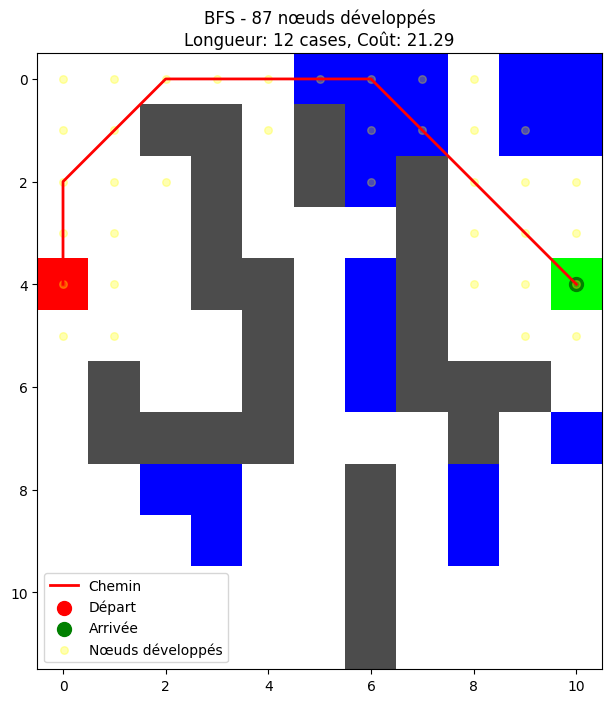

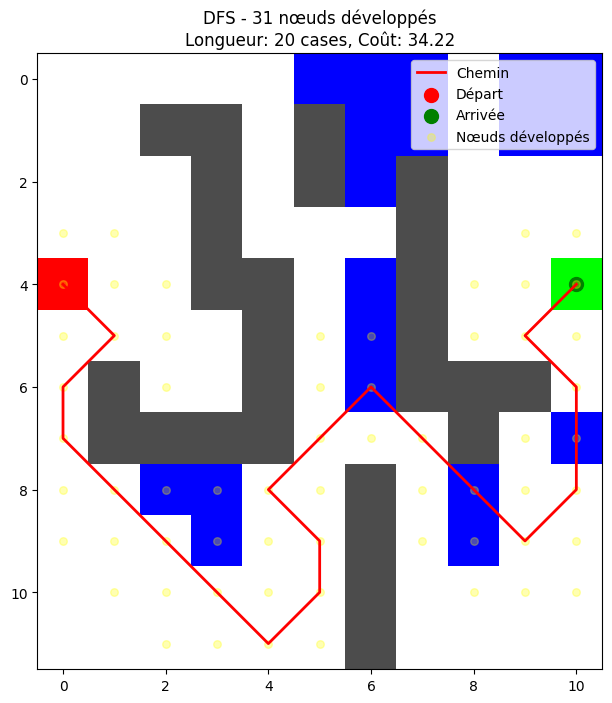

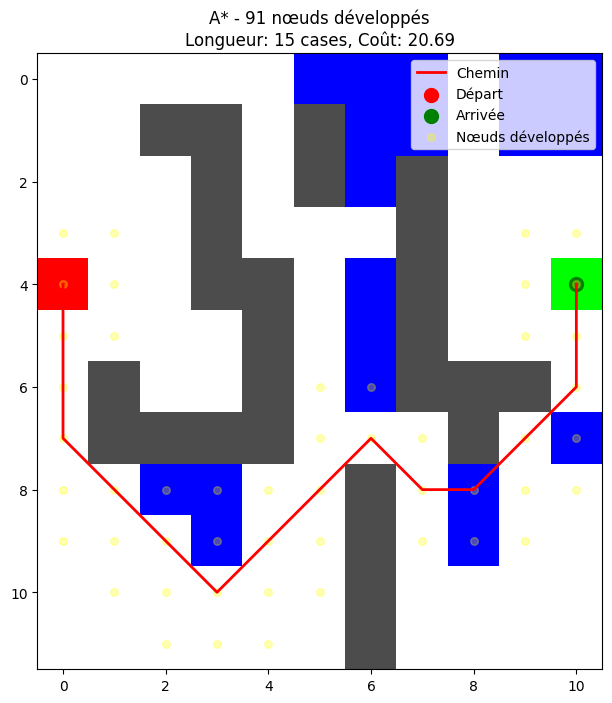

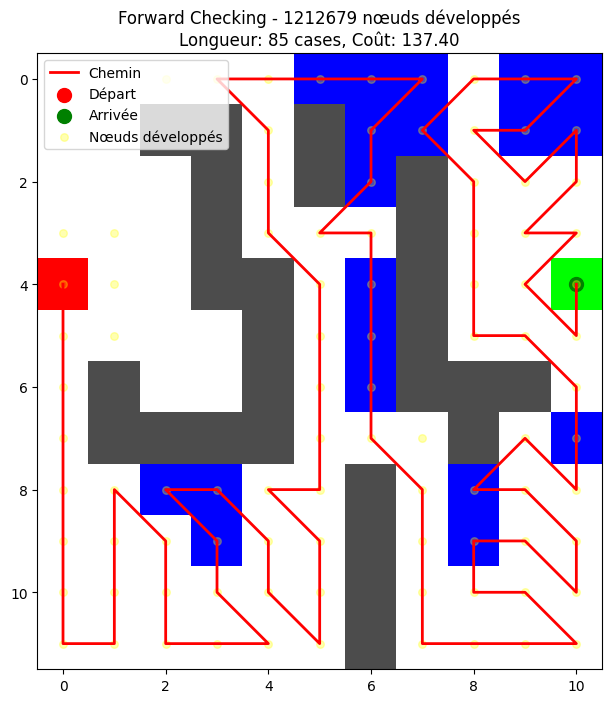

In [17]:
# Exécution des algorithmes
results = []
algorithms = {
    "BFS": bfs,
    "DFS": dfs,
    "A*": a_star,
    "Forward Checking": forward_checking
}

for name, algo in algorithms.items():
    start_time = time.time()
    path, cost, nodes = algo(grid, start_pos, exit_pos)
    exec_time = time.time() - start_time

    results.append({
        'Algorithme': name,
        'Chemin trouvé': bool(path),
        'Coût total': cost,
        'Longueur chemin': len(path) if path else 0,
        'Nœuds développés': nodes,
        'Temps (ms)': round(exec_time*1000, 2),
        'Optimal': 'Oui' if name in ['A*'] else 'Non'
    })

    # Visualisation
    if path:
        developed = set()
        for i in range(len(path)):
            for neighbor, _ in get_neighbors(grid, path[i]):
                developed.add(neighbor)
        plot_solution(grid, path, developed, f"{name} - {nodes} nœuds développés")


In [18]:
# Affichage du tableau comparatif
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.DataFrame(results)
print(df[['Algorithme', 'Coût total', 'Nœuds développés', 'Temps (ms)', 'Optimal']])

         Algorithme  Coût total  Nœuds développés  Temps (ms) Optimal
0               BFS       21.29                87        0.79     Non
1               DFS       34.22                31        0.32     Non
2                A*       20.69                91        1.73     Oui
3  Forward Checking      137.40           1212679    14742.30     Non


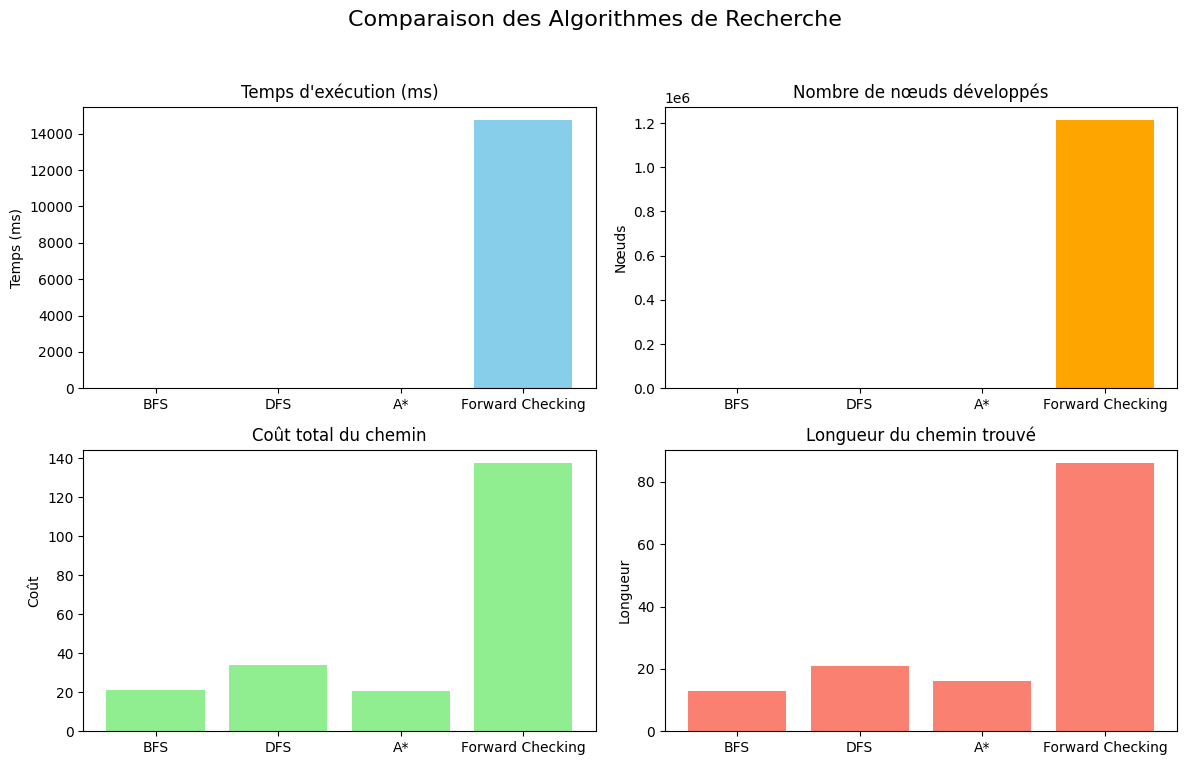

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir les résultats en DataFrame
df_results = pd.DataFrame(results)

# Création de graphiques comparatifs
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparaison des Algorithmes de Recherche', fontsize=16)

# Temps d'exécution
axes[0, 0].bar(df_results['Algorithme'], df_results['Temps (ms)'], color='skyblue')
axes[0, 0].set_title("Temps d'exécution (ms)")
axes[0, 0].set_ylabel("Temps (ms)")

# Nœuds développés
axes[0, 1].bar(df_results['Algorithme'], df_results['Nœuds développés'], color='orange')
axes[0, 1].set_title("Nombre de nœuds développés")
axes[0, 1].set_ylabel("Nœuds")

# Coût total
axes[1, 0].bar(df_results['Algorithme'], df_results['Coût total'], color='lightgreen')
axes[1, 0].set_title("Coût total du chemin")
axes[1, 0].set_ylabel("Coût")

# Longueur du chemin
axes[1, 1].bar(df_results['Algorithme'], df_results['Longueur chemin'], color='salmon')
axes[1, 1].set_title("Longueur du chemin trouvé")
axes[1, 1].set_ylabel("Longueur")

# Ajuster l'espacement
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [20]:
import tracemalloc
import time

# Dictionnaire pour stocker les résultats
results = {}

# Liste des algorithmes à tester
algorithms = {
    "BFS": bfs,
    "DFS": dfs,
    "A*": a_star,
    "Forward Checking": forward_checking
}

for name, algo in algorithms.items():
    tracemalloc.start()
    start_time = time.time()

    try:
        path, cost, nodes = algo(grid, DEPART, ARRIVEE)
    except:
        path, cost, nodes = None, float('inf'), 0

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    results[name] = {
        "Time (s)": round(end_time - start_time, 4),
        "Peak Memory (KB)": round(peak / 1024, 2),
        "Nodes Expanded": nodes,
        "Path Length": len(path) if path else 0,
        "Path Cost": cost
    }

# Vérifier les résultats bruts (optionnel)
for algo, vals in results.items():
    print(f"{algo}: {vals}")


BFS: {'Time (s)': 0.0005, 'Peak Memory (KB)': 2.05, 'Nodes Expanded': 0, 'Path Length': 0, 'Path Cost': inf}
DFS: {'Time (s)': 0.0, 'Peak Memory (KB)': 1.12, 'Nodes Expanded': 0, 'Path Length': 0, 'Path Cost': inf}
A*: {'Time (s)': 0.0, 'Peak Memory (KB)': 0.87, 'Nodes Expanded': 0, 'Path Length': 0, 'Path Cost': inf}
Forward Checking: {'Time (s)': 0.0, 'Peak Memory (KB)': 1.19, 'Nodes Expanded': 0, 'Path Length': 0, 'Path Cost': inf}


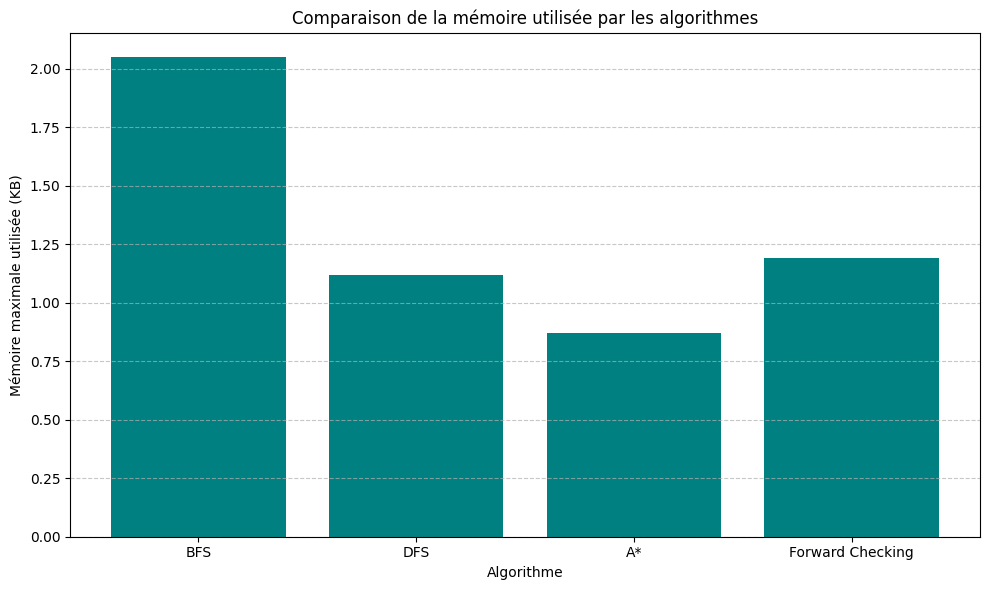

In [21]:
import matplotlib.pyplot as plt

# Données pour le graphique
algo_names = list(results.keys())
peak_memory = [results[algo]["Peak Memory (KB)"] for algo in algo_names]

# Tracer le bar chart
plt.figure(figsize=(10, 6))
plt.bar(algo_names, peak_memory, color='teal')
plt.xlabel("Algorithme")
plt.ylabel("Mémoire maximale utilisée (KB)")
plt.title("Comparaison de la mémoire utilisée par les algorithmes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


✅ En conclusion :
  - A* est le meilleur choix pour la recherche de chemin avec des coûts variables.

  - BFS est optimal uniquement si tous les coûts sont égaux.

  - DFS n’est jamais garanti d’être optimal.

  - Forward checking n’est pas fait pour les graphes pondérés.



🔍 Pourquoi tant de nœuds ?
Voici quelques raisons probables :

1. Pas de mémorisation efficace des états déjà explorés
Contrairement à A*, BFS ou DFS classiques, ton forward_checking n’utilise pas de structure comme visited ou closed set pour éviter de revisiter les mêmes cases. Résultat : il revisite les mêmes chemins encore et encore avec des "domaines" différents.

2. Empilement massif dû aux domaines
Tu empiles une nouvelle copie du domain pour chaque voisin non visité. Comme domain est un set, il est copié à chaque fois, ce qui augmente exponentiellement le nombre de configurations différentes même pour les mêmes positions.

3. Pas de réelle contrainte forte à checker
Forward Checking est efficace en CSP quand les contraintes réduisent fortement le domaine possible. Mais ici, dans une simple grille de mouvement, il y a peu de contraintes strictes donc... ça ne prune presque rien.